In [74]:
import pandas as pd
import numpy as np

In [75]:
df = pd.read_csv("https://raw.githubusercontent.com/catharzis/penguins/master/penguins.csv")

In [76]:
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [77]:
df.shape

(344, 7)

Dataset constists 7 cols.

* species – type of peng
* island – name of island where he lives
* bill_legth_mm – legth of culmen**
* bill_depth_mm - depth of culmen**
* flipper_length_mm – length of flipper
* body_mass – mass of body
* sex – sex

** culmen is the upper ridge of a bird's beak

# Target

In [98]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [100]:
df.species.value_counts(normalize=True)

Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: species, dtype: float64

In [121]:
type(tagret_series)

pandas.core.series.Series

In [128]:
# targets as list
list_of_target = df.species.tolist()

In [137]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(list_of_target)

list(le.classes_)

encoded_target = le.transform(list_of_target)

In [140]:
# encoded target series
encoded_target_series = pd.Series(encoded_target)

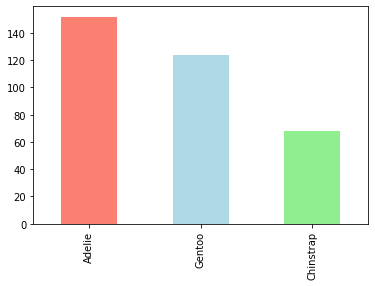

In [146]:
tagret_series.plot(kind="bar", color=["salmon", "lightblue", "lightgreen"]);

In [78]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [79]:
df.describe(include=['O'])

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Missings

In [81]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [82]:
# function for percentage
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
sex,11,0.031977
body_mass_g,2,0.005814
flipper_length_mm,2,0.005814
bill_depth_mm,2,0.005814
bill_length_mm,2,0.005814
island,0,0.000000
species,0,0.000000


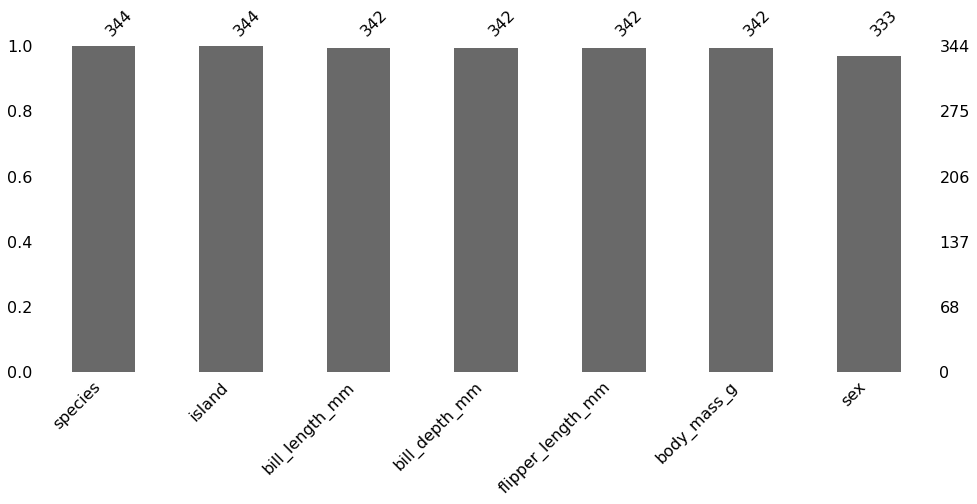

In [83]:
# missongno
import missingno as msno
msno.bar(df, figsize=(16, 6))

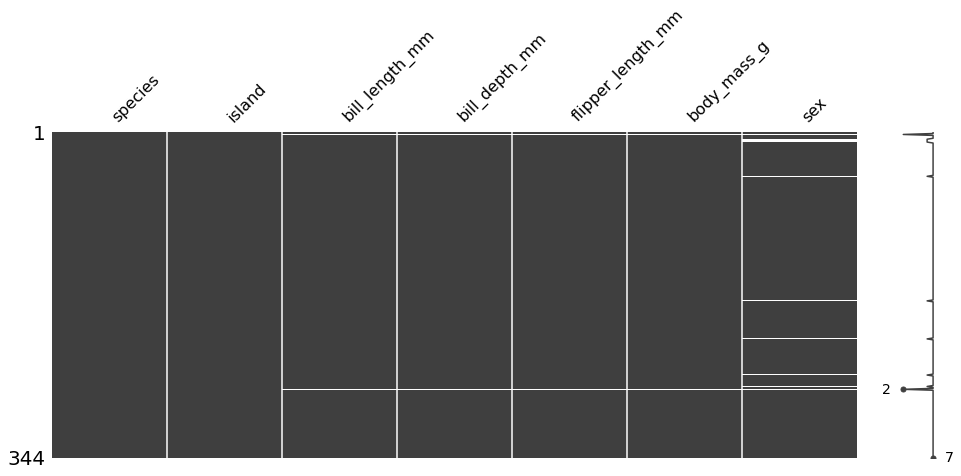

In [84]:
msno.matrix(df, figsize=(16, 6));

In [85]:
df.describe().columns # numerical features

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

Deviding to num and cat

In [86]:
df_num = df[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
df_cat = df[['sex', 'island', 'species']]

In [87]:
df_num.head(5)

,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm
0,3750.0,39.1,18.7,181.0
1,3800.0,39.5,17.4,186.0
2,3250.0,40.3,18.0,195.0
3,NaN,NaN,NaN,NaN
4,3450.0,36.7,19.3,193.0


In [88]:
df_cat.head(5)

,sex,island,species
0,male,Torgersen,Adelie
1,female,Torgersen,Adelie
2,female,Torgersen,Adelie
3,NaN,Torgersen,Adelie
4,female,Torgersen,Adelie


# Gystograms (num)

In [89]:
import matplotlib.pyplot as plt

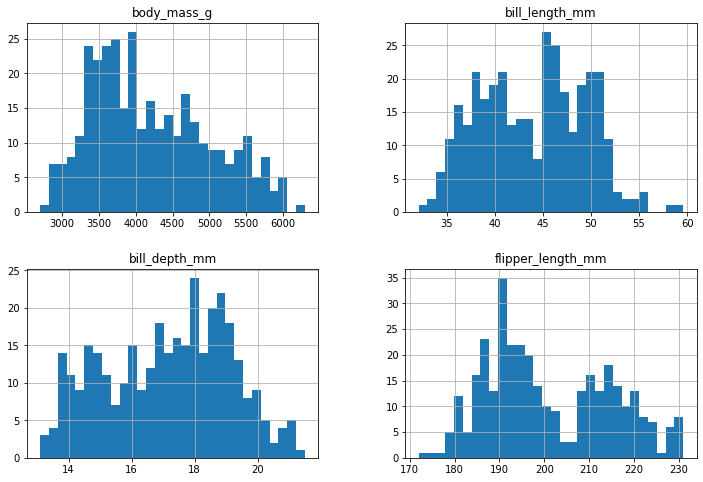

In [90]:
df_num.hist(bins= 30, figsize=(12,8));

# Correlations (num)

In [91]:
import seaborn as sns

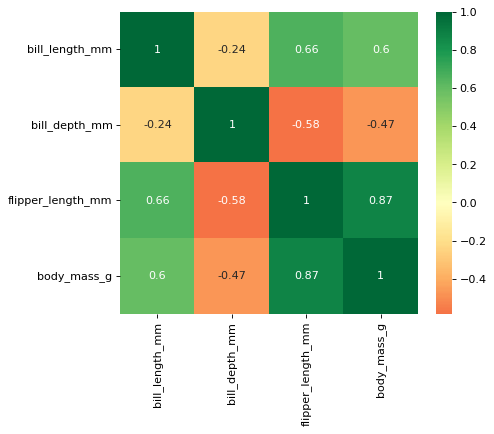

In [96]:
plt.figure(figsize=(6, 5), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns,
            yticklabels=df.corr().columns,
            cmap='RdYlGn',
            center=0,
            annot=True);

In [147]:
df.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female


In [148]:
df.sex.value_counts()

male      168
female    165
Name: sex, dtype: int64

In [153]:
# species depending of island
speies_island_cross = pd.crosstab(df.species, df.island)
speies_island_cross

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,56,52
Chinstrap,0,68,0
Gentoo,124,0,0


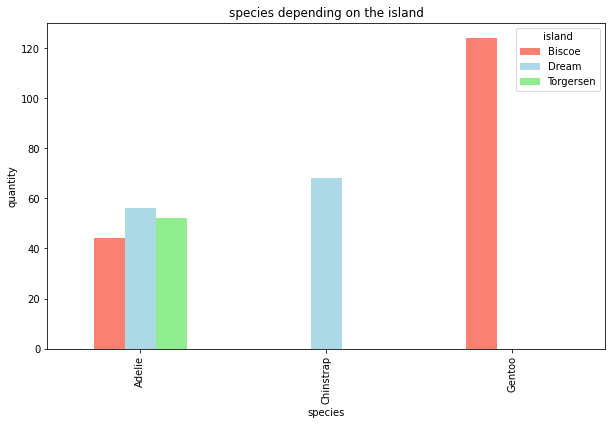

In [157]:
speies_island_cross.plot(kind = 'bar', 
                         figsize = (10,6),
                         color=['salmon', 'lightblue', 'lightgreen']);

plt.title('species depending on the island')
plt.xlabel("species")
plt.ylabel("quantity");

We can take the hypothesis that the type of penguin depends on its habitat.

# Pivot table

In [158]:
pd.pivot_table(df, index = 'species', values = ['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'])

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm
species,,,,
Adelie,18.346358,38.791391,3700.662252,189.953642
Chinstrap,18.420588,48.833824,3733.088235,195.823529
Gentoo,14.982114,47.504878,5076.016260,217.186992
